# Non-image data persistence using NumPy

Previously, we've saved and loaded only images with OpenCV's `cv2.imwrite` and `cv2.imread` functions, respectively. But it's possible to save any matrix (not only with image content) of any type and shape with NumPy's data persistence. In this recipe, we will review how to do it.

In [1]:
import cv2

import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


mat
  Shape: (512, 512)   Data type: float32
[ 0.37454012 0.9507143 0.7319939 0.5986585 0.15601864 0.15599452 0.058083612 0.8661761 0.601115 0.7080726 ]  mat: float32


<Figure size 216x216 with 0 Axes>

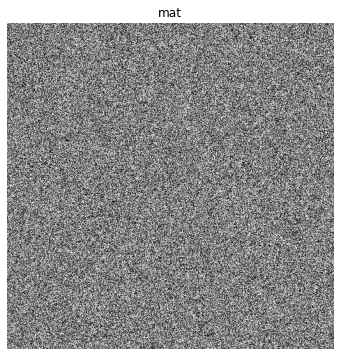

In [2]:
np.random.seed(42)

# We'll use np.random.rand to generate
# a grid of 100x100 random numbers
mat = np.random.rand(512, 512).astype(np.float32)


#############################################################
print_image('mat', 'mat',  mat,0,1,0,10)
plt.figure(figsize=(3,3))
plt_view_image(plt,[["mat",mat]  ])

In [3]:
# We'll save it using np's savetxt function
np.savetxt('mat.csv', mat)

mat
  Shape: (512, 512)   Data type: float32
[ 0.37454012 0.9507143 0.7319939 0.5986585 0.15601864 0.15599452 0.058083612 0.8661761 0.601115 0.7080726 ]  mat: float32
mat_loaded
  Shape: (512, 512)   Data type: float32
[ 0.37454012 0.9507143 0.7319939 0.5986585 0.15601864 0.15599452 0.058083612 0.8661761 0.601115 0.7080726 ]  mat_loaded: float32


<Figure size 432x432 with 0 Axes>

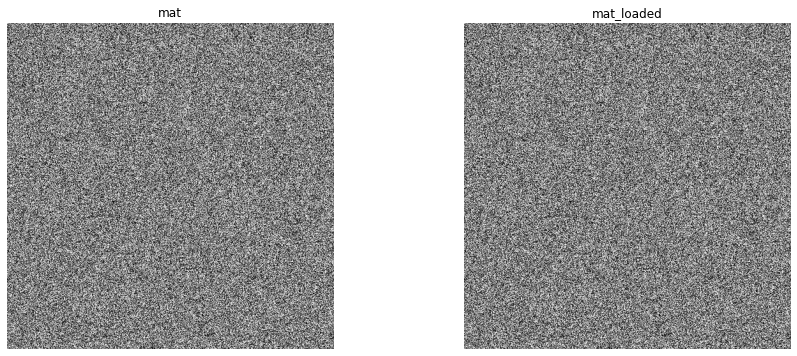

In [4]:
# If we save something, 
# we should know how to retrieve it later on
# We'll use np's loadtxt function to load the csv

mat_loaded = np.loadtxt('mat.csv').astype(np.float32)


#############################################################
print_image('mat', 'mat',  mat,0,1,0,10)
print_image('mat_loaded', 'mat_loaded',  mat_loaded,0,1,0,10)

plt.figure(figsize=(6,6))
plt_view_image(plt,[["mat",mat], ["mat_loaded",mat_loaded]  ])

In [5]:
# Finally, let's display the results
# The result would be 100x100 pixels
# of random shades between black and white

cv2.imshow('mat, mat_loaded', np.hstack([mat, mat_loaded]))
cv2.waitKey()
cv2.destroyAllWindows()